In [5]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [8]:
!pip install matplotlib

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Modeli ve tokenizer'ı yükleme
model_name = "WhiteAngelss/bert-base-turkish-psychology"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [10]:
# Örnek bir metin
text = "Bu proje çok heyecan verici!"

# Metni tokenize edin
inputs = tokenizer(text, return_tensors="pt")

# Modeli çalıştırın ve sonuçları alın
with torch.no_grad():
    outputs = model(**inputs)

# Sonuçları alın
logits = outputs.logits
predicted_class_id = torch.argmax(logits).item()

# Sınıflar
classes = ["Psikolojik Baskılar", "Irkçılık", "Kaba Konuşma", "Nötr", "Positive"]

# Tahmin edilen sınıfı yazdırın
print(f"Tahmin edilen sınıf: {classes[predicted_class_id]}")


Tahmin edilen sınıf: Nötr


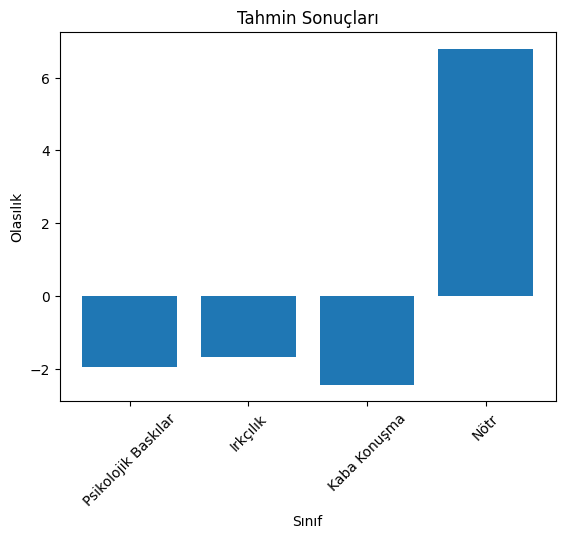

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sonuçları görselleştirin
logits_np = logits.numpy()[0]
plt.bar(classes, logits_np)
plt.xlabel('Sınıf')
plt.ylabel('Olasılık')
plt.title('Tahmin Sonuçları')
plt.xticks(rotation=45)
plt.show()
